<h2 style="text-align:center;font-size:200%;;"> [Pyspark] Data Exploration and Analysis  </h2>

In [86]:
INPUT_FILE = "artifacts/data_ingestion/training.1600000.processed.noemoticon.csv"
OUTPUT_FILE = (
    "artifacts/data_ingestion/training.1600000.processed.noemoticon_cleaned.csv"
)

### setup

In [99]:
# %%capture
# %pip install -r requirements.txt

In [100]:
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib

matplotlib.rcParams["figure.dpi"] = 100
%matplotlib inline

In [101]:
%cd /app
sys.path.append("src")

/app


In [102]:
# Import PySpark related modules
import pyspark
from IPython.core.interactiveshell import InteractiveShell
from pyspark.sql import SparkSession

# Initialize a spark session.
MAX_MEMORY = "4G"
conf = (
    pyspark.SparkConf()
    .setMaster("local[*]")
    .set("spark.executor.heartbeatInterval", 10000)
    .set("spark.network.timeout", 10000)
    .set("spark.core.connection.ack.wait.timeout", "3600")
    .set("spark.executor.memory", MAX_MEMORY)
    .set("spark.driver.memory", MAX_MEMORY)
)
# initait ethe sperk session
spark = (
    SparkSession.builder.appName("ETL with Spark RDD").config(conf=conf).getOrCreate()
)

# 0. Data loading and Cleaning

## 0. load the data 

In [103]:
# Import PySpark related modules
import pyspark.sql.functions as f
from utils.spark_utils import init_spark, spark_load_data

# initialize the spark sessions
spark = init_spark(MAX_MEMORY="4G")

# Load the main dataset into pyspark data frame
spark_df = spark_load_data(spark, INPUT_FILE)

There are total=1599999 rows
Raw data :
    0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no

In [104]:
new_columns_names = ["target", "ids", "date", "flag", "user", "text"]
set(spark_df.columns) == set(new_columns_names)

False

## 0.2 clean the data

In [105]:
# assign the coulmns names
new_columns_names = ["target", "ids", "date", "flag", "user", "text"]
spark_df = spark_df.toDF(*new_columns_names)

# sort rows by date
spark_df = spark_df.orderBy("date")
spark_df.show()

[Stage 121:>                                                        (0 + 4) / 4]

+------+----------+--------------------+--------+---------------+--------------------+
|target|       ids|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|     0|1548274671|Fri Apr 17 20:30:...|NO_QUERY|   xoLovebug224|Working on my son...|
|     0|1548274782|Fri Apr 17 20:30:...|NO_QUERY|    Kerry_Baker|can't sleep, it's...|
|     0|1548275152|Fri Apr 17 20:30:...|NO_QUERY|glamorusindie81|wishing i could b...|
|     0|1548275569|Fri Apr 17 20:30:...|NO_QUERY|          WOnet|Well, @LilWO was ...|
|     0|1548275799|Fri Apr 17 20:30:...|NO_QUERY|jessicakornberg|taking some much ...|
|     0|1548275819|Fri Apr 17 20:30:...|NO_QUERY|        MrzEndy|@latinluvly aww w...|
|     0|1548275856|Fri Apr 17 20:30:...|NO_QUERY|      WampusKat|@chriswhill sweet...|
|     0|1548276175|Fri Apr 17 20:30:...|NO_QUERY|   thisgoeshere|my boyfriend is g...|
|     0|1548276354|Fri Apr 17 20:30:...|NO_

In [106]:
spark_df.limit(5).toPandas()

,target,ids,date,flag,user,text
0,0,1548274671,Fri Apr 17 20:30:31 PDT 2009,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...
1,0,1548274782,Fri Apr 17 20:30:34 PDT 2009,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a..."
2,0,1548275152,Fri Apr 17 20:30:38 PDT 2009,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...
3,0,1548275569,Fri Apr 17 20:30:39 PDT 2009,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan..."
4,0,1548275799,Fri Apr 17 20:30:43 PDT 2009,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...


In [107]:
spark_df = spark_df.limit(50)

In [108]:
spark_df.show()

[Stage 123:============================>                            (2 + 2) / 4]

+------+----------+--------------------+--------+---------------+--------------------+
|target|       ids|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|     0|1548274671|Fri Apr 17 20:30:...|NO_QUERY|   xoLovebug224|Working on my son...|
|     0|1548274782|Fri Apr 17 20:30:...|NO_QUERY|    Kerry_Baker|can't sleep, it's...|
|     0|1548275152|Fri Apr 17 20:30:...|NO_QUERY|glamorusindie81|wishing i could b...|
|     0|1548275569|Fri Apr 17 20:30:...|NO_QUERY|          WOnet|Well, @LilWO was ...|
|     0|1548275799|Fri Apr 17 20:30:...|NO_QUERY|jessicakornberg|taking some much ...|
|     0|1548275819|Fri Apr 17 20:30:...|NO_QUERY|        MrzEndy|@latinluvly aww w...|
|     0|1548275856|Fri Apr 17 20:30:...|NO_QUERY|      WampusKat|@chriswhill sweet...|
|     0|1548276175|Fri Apr 17 20:30:...|NO_QUERY|   thisgoeshere|my boyfriend is g...|
|     0|1548276354|Fri Apr 17 20:30:...|NO_

# 1. Data Preparation

In [109]:
from utils.data_exploration import data_preparation_pipeline

# run the data preparation pipeline
spark_df, missing_invalid_df = data_preparation_pipeline(spark, spark_df)



 - data preparation in process ...


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Returns` cannot be resolved. Did you mean one of the following? [`target`, `ids`, `date`, `flag`, `user`, `text`].

In [ ]:
spark_df.limit(5).toPandas()

In [ ]:
missing_invalid_df

# 2.Data Analysis

In [ ]:
from utils.data_exploration import data_analysis_pipeline

# run the data analysis pipeline
(
    monthly_sales,
    past_sales_stats_df,
    current_sales_stats_df,
    growth_rate_dict,
    top_ranked_clients_df,
    worst_ranked_clients_df,
    top_purchases_by_gender_df,
) = data_analysis_pipeline(spark, spark_df, topN=topN, verbose=0)

#### visualizations

In [ ]:
monthly_sales

In [ ]:
past_sales_stats_df.round(1).to_dict(orient="records")

In [ ]:
current_sales_stats_df.round(1).to_dict(orient="records")

In [ ]:
growth_rate_dict

In [ ]:
top_ranked_clients_df

In [ ]:
top_ranked_clients_df.astype(str).to_dict(orient="records")

In [ ]:
worst_ranked_clients_df.astype(str).to_dict(orient="records")

In [ ]:
top_purchases_by_gender_df.astype(str).to_dict(orient="records")

# 3. Data Modeling

In [ ]:
from utils.data_exploration import data_modeling_pipeline

data_modeling_pipeline()

# 4. Model Deployment

In [ ]:
from utils.data_exploration import model_deployment_pipeline

model_deployment_pipeline()

# 5. Save results

In [ ]:
from utils.data_exploration import save_dict_to_json, load_dict_from_json

### 5.1 save output for testing and dev

In [ ]:
save_dict_to_json(ratio_gender_dict, filepath="data/test/ratio_gender_dict.json")
save_dict_to_json(growth_rate_dict, filepath="data/test/growth_rate_dict.json")
save_dict_to_json(clients_dict, filepath="data/test/clients_dict.json")

save_dict_to_json(
    current_sales.toPandas().astype(str).to_dict(orient="records"),
    filepath="data/test/current_sales.json",
)
save_dict_to_json(
    past_sales.toPandas().astype(str).to_dict(orient="records"),
    filepath="data/test/past_sales.json",
)

In [ ]:
save_dict_to_json(
    past_sales_stats_df.astype(str).to_dict(orient="records"),
    filepath="data/test/past_sales_stats_df.json",
)
save_dict_to_json(
    current_sales_stats_df.astype(str).to_dict(orient="records"),
    filepath="data/test/current_sales_stats_df.json",
)
save_dict_to_json(
    past_sales.toPandas().astype(str).to_dict(orient="records"),
    filepath="data/test/past_sales.json",
)

save_dict_to_json(
    top_ranked_clients_df.astype(str).to_dict(orient="records"),
    filepath="data/test/top_ranked_clients_df.json",
)
save_dict_to_json(
    worst_ranked_clients_df.astype(str).to_dict(orient="records"),
    filepath="data/test/worst_ranked_clients_df.json",
)

save_dict_to_json(
    top_purchases_by_gender_df.astype(str).to_dict(orient="records"),
    filepath="data/test/top_purchases_by_gender_df.json",
)

In [ ]:
save_dict_to_json(
    ranked_product_category_df.astype(str).to_dict(orient="records"),
    filepath="data/test/ranked_product_category_df.json",
)
save_dict_to_json(
    monthly_stats_spark_df.toPandas().astype(str).to_dict(orient="records"),
    filepath="data/test/monthly_stats_spark_df.json",
)
save_dict_to_json(
    yearly_stats_spark_df.toPandas().astype(str).to_dict(orient="records"),
    filepath="data/test/yearly_stats_spark_df.json",
)

### 7.2 load results

In [ ]:
growth_rate_dict = load_dict_from_json(filepath="data/test/growth_rate_dict.json")
ratio_gender_dict = load_dict_from_json(filepath="data/test/ratio_gender_dict.json")
clients_dict = load_dict_from_json(filepath="data/test/clients_dict.json")

yearly_stats_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/yearly_stats_spark_df.json")
)
monthly_stats_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/monthly_stats_spark_df.json")
)
past_sales_stats_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/past_sales_stats_df.json")
)
current_sales_stats_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/current_sales_stats_df.json")
)
top_ranked_clients_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/top_ranked_clients_df.json")
)
worst_ranked_clients_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/worst_ranked_clients_df.json")
)
top_purchases_by_gender_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/top_purchases_by_gender_df.json")
)
ranked_product_category_df = pd.DataFrame(
    load_dict_from_json(filepath="data/test/ranked_product_category_df.json")
)

### 7.2 load results

In [ ]:
from utils.data_exploration import demo_preparation_modeling_pipelines

# Build the response dictionary
data_dict, stats_dict = demo_preparation_modeling_pipelines()

In [ ]:
data_dict

In [ ]:
stats_dict

# DEV

In [ ]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats

matplotlib.rcParams["figure.dpi"] = 100
InteractiveShell.ast_node_interpurchase = "all"
%matplotlib inline

sys.path.append("src")

In [ ]:
# Import PySpark related modules
from utils.data_exploration import init_spark

spark = init_spark(MAX_MEMORY="4G")

In [ ]:
# INPUT_FILE = "data/purchase_data.xltx"
INPUT_FILE = "data/purchase_data_sample.xlsx"

# Load the main data set into pyspark data frame
df = pd.read_excel(INPUT_FILE)
spark_df = spark.createDataFrame(df)
print("Data frame type: " + str(type(spark_df)))

In [ ]:
# INPUT_FILE = "data/purchase_data_sample.xlsx"

# # save sample data
# save_sample_data(df, INPUT_FILE, nrows=100)

In [ ]:
print("Data frame stats (string and numeric columns only):")
spark_df.describe().toPandas()
print(f"There are total {spark_df.count()} row, Lets show 5 rows:")
spark_df.limit(5).toPandas()

In [ ]:
spark_df = spark_df.limit(20)

In [ ]:
spark_df = spark_df.orderBy("Date")

### 2.1 Schema  & datatypes
   *The data columns format (bigint, timestamp, double, string) and columns made of signle values not arrays/list.*

In [ ]:
print("Data Columns overview")
spark_df.printSchema()
pd.DataFrame(spark_df.dtypes, columns=["Column Name", "Data type"]).set_index(
    ["Column Name"]
).T

In [ ]:
from utils.data_exploration import categorize_columns

# categorise the different columns
string_columns, numeric_columns, array_columns, timestamp_columns, unkown_columns = (
    categorize_columns(spark_df)
)

In [ ]:
from utils.data_exploration import count_missing_invalid_values

# count the missing values
count_missing_invalid_values(spark_df)

###  3.1 replace missing  values

- replace the 18% missingvalues of `Returns` by zero

In [ ]:
# #Replace 0 for null on only population column
# spark_df=spark_df.na.fill(value=0,subset=["Returns"])

# # count the missing values
# count_missing_values(spark_df)

In [ ]:
from utils.data_exploration import plot_columns, generate_explode

In [ ]:
spark_df.columns

In [ ]:
#  plot the target variation
plot_columns(spark_df, x_column="target", y_columns=["date", "ids"], subplot=True)

###  3.2 remove the unvalid value (negative price, quantity, others)
- remove the 18% negative quantities  

In [ ]:
nb_unvalid_values = (
    spark_df.select("*").where((f.col("target") > 3) | (f.col("target") < 0)).count()
)
total_nb_samples = spark_df.count()

if nb_unvalid_values >= 0:
    print(
        f"- {nb_unvalid_values}/{total_nb_samples} unvalid (negative) values are removed from the database "
    )
    spark_df = spark_df.select("*").where(
        (f.col("target") <= 3) & (f.col("target") >= 0)
    )

In [ ]:
spark_df.limit(5).toPandas()

In [ ]:
sentiment_sample_count_sdf = (
    spark_df.select(spark_df.target, spark_df.ids)
    .distinct()
    .groupBy(spark_df.target)
    .count()
    .orderBy("count", ascending=False)
)

# Top 5 purchase types
sentiment_stats_df = sentiment_sample_count_sdf.toPandas()
# Rename column name : "count" --> Clients count
sentiment_stats_df.rename(columns={"count": "samples count"}, inplace=True)
sentiment_stats_df

In [ ]:
# show sentiment "0"
spark_df.filter(spark_df.target == "0").limit(5).show(truncate=False)

In [ ]:
# show sentiment "4"
spark_df.filter(spark_df.target == "4").limit(5).show(truncate=False)

Thank you for reading my work, wish you strong and stay safe

# SYNTAX

In [6]:
%cd /app
import sys

sys.path.append("src")

/app


In [7]:
INPUT_FILE = "data/sentiment140/training.1600000.processed.noemoticon.csv"
OUTPUT_FILE = "data/customer_totals"

In [8]:
!ls artifacts/data_ingestion/

data.zip
training.1600000.processed.noemoticon.csv
training.1600000.processed.noemoticon_processed.csv


# ETL Process

## 0. Initialize a spark session

In [9]:
# Import PySpark related modules
import pyspark
from IPython.core.interactiveshell import InteractiveShell
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

# Initialize a spark session.
MAX_MEMORY = "4G"
conf = (
    pyspark.SparkConf()
    .setMaster("local[*]")
    .set("spark.executor.heartbeatInterval", 10000)
    .set("spark.network.timeout", 10000)
    .set("spark.core.connection.ack.wait.timeout", "3600")
    .set("spark.executor.memory", MAX_MEMORY)
    .set("spark.driver.memory", MAX_MEMORY)
)
# initait ethe sperk session
spark = (
    SparkSession.builder.appName("ETL with Spark RDD").config(conf=conf).getOrCreate()
)

## 1. Extract

In [10]:
# Step 1: Extract
from utils.spark_utils import spark_load_data

# Load the main dataset into pyspark data frame
df = spark.read.csv(INPUT_FILE, header=True, inferSchema=True)

### 1.1 Schema  & datatypes

In [11]:
df.printSchema()

root
 |-- 0: integer (nullable = true)
 |-- 1467810369: long (nullable = true)
 |-- Mon Apr 06 22:19:45 PDT 2009: string (nullable = true)
 |-- NO_QUERY: string (nullable = true)
 |-- _TheSpecialOne_: string (nullable = true)
 |-- @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D: string (nullable = true)



The header is missing. thus we need to add it to the dataframe

In [12]:
# assign the coulmns names
new_columns_names = ["target", "ids", "date", "flag", "user", "text"]
df = df.toDF(*new_columns_names)
# sort rows by date
df = df.orderBy("date")

# show data schema and samples
df.printSchema()
df.limit(5).toPandas()

root
 |-- target: integer (nullable = true)
 |-- ids: long (nullable = true)
 |-- date: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



,target,ids,date,flag,user,text
0,0,1548274671,Fri Apr 17 20:30:31 PDT 2009,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...
1,0,1548274782,Fri Apr 17 20:30:34 PDT 2009,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a..."
2,0,1548275152,Fri Apr 17 20:30:38 PDT 2009,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...
3,0,1548275569,Fri Apr 17 20:30:39 PDT 2009,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan..."
4,0,1548275799,Fri Apr 17 20:30:43 PDT 2009,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...


### 1.2 clean the data: missing value, invalid values

In [69]:
# remove rows with faulty or missing records
df_cleaned = (
    df.dropna()
)  # subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID'])


# display message
initial_nb_samples = df.count()
cleaned_nb_samples = initial_nb_samples - df_cleaned.count()
if cleaned_nb_samples > 0:
    print(f"- {cleaned_nb_samples}/{initial_nb_samples} samples were cleaned!")
else:
    print(f"-  the data does not need cleaning!")

[Stage 136:==========================================>              (3 + 1) / 4]

-  the data does not need cleaning!


## 2. Transform

convert the data to timestamp format from `Fri Apr 17 20:30:31 PDT 2009` to `2009-04-17 20:30:31`using `to_timestamp` from [spark sql-ref-datetime-pattern](https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html) 

In [70]:
# convert data type to a col
# # Spark might give different results based on the version. Thus, "LEGACY" is needed to ensure correct results
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")
df_cleaned = df_cleaned.withColumnRenamed("date", "date_original_format")
df_cleaned = df_cleaned.withColumn(
    "timestamp", f.to_timestamp("date_original_format", "E MMM dd HH:mm:ss z yyyy")
)
df_cleaned = df_cleaned.withColumn(
    "date", f.to_date("date_original_format", "E MMM dd HH:mm:ss z yyyy")
)
df_cleaned.printSchema()
df_cleaned.limit(5).toPandas()

root
 |-- target: integer (nullable = true)
 |-- ids: long (nullable = true)
 |-- date_original_format: timestamp (nullable = true)
 |-- flag: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- date: date (nullable = true)



,target,ids,date_original_format,flag,user,text,timestamp,date
0,0,1548274671,2009-04-18 03:30:31,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...,2009-04-18 03:30:31,2009-04-18
1,0,1548274782,2009-04-18 03:30:34,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a...",2009-04-18 03:30:34,2009-04-18
2,0,1548275152,2009-04-18 03:30:38,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...,2009-04-18 03:30:38,2009-04-18
3,0,1548275569,2009-04-18 03:30:39,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan...",2009-04-18 03:30:39,2009-04-18
4,0,1548275799,2009-04-18 03:30:43,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...,2009-04-18 03:30:43,2009-04-18


In [71]:
df_cleaned = df_cleaned.withColumn(
    "label",
    f.when(f.col("target") == 0, f.lit("negative sentiment")).otherwise(
        f.lit("positive sentiment")
    ),
)
df_cleaned.limit(5).toPandas()

,target,ids,date_original_format,flag,user,text,timestamp,date,label
0,0,1548274671,2009-04-18 03:30:31,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...,2009-04-18 03:30:31,2009-04-18,negative sentiment
1,0,1548274782,2009-04-18 03:30:34,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a...",2009-04-18 03:30:34,2009-04-18,negative sentiment
2,0,1548275152,2009-04-18 03:30:38,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...,2009-04-18 03:30:38,2009-04-18,negative sentiment
3,0,1548275569,2009-04-18 03:30:39,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan...",2009-04-18 03:30:39,2009-04-18,negative sentiment
4,0,1548275799,2009-04-18 03:30:43,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...,2009-04-18 03:30:43,2009-04-18,negative sentiment


## 3. Loading and Exploration

### 3.1 analyze the tweets sentiments trends over time

In [72]:
# sentiments_trend = df_cleaned.groupBy("date").count()#.orderBy("label", ascending=False)
# sentiments_trend.show(10)

sentiments_trend = (
    df_cleaned.select(df_cleaned.date, df_cleaned.label)
    .groupBy(df_cleaned.label)
    .count()
    .orderBy("count", ascending=False)
)

sentiments_trend.show(10)

[Stage 147:==============>                                          (1 + 3) / 4]

+------------------+------+
|             label| count|
+------------------+------+
|positive sentiment|800000|
|negative sentiment|799999|
+------------------+------+



In [73]:
monthly_sentiments_trend = (
    df_cleaned.groupBy(
        f.col("date"),
        f.year("date").alias("year"),
        f.month("date").alias("month"),
        f.day("date").alias("day"),
        f.col("label"),
    )
    .agg(f.count("target").alias("number_tweeks"))
    .orderBy("year", "month", "day")
)
monthly_sentiments_trend.show()

[Stage 150:============================>                            (2 + 2) / 4]

+----------+----+-----+---+------------------+-------------+
|      date|year|month|day|             label|number_tweeks|
+----------+----+-----+---+------------------+-------------+
|2009-04-07|2009|    4|  7|negative sentiment|         8574|
|2009-04-07|2009|    4|  7|positive sentiment|        12096|
|2009-04-18|2009|    4| 18|negative sentiment|         7075|
|2009-04-18|2009|    4| 18|positive sentiment|        10079|
|2009-04-19|2009|    4| 19|negative sentiment|        13579|
|2009-04-19|2009|    4| 19|positive sentiment|        19069|
|2009-04-20|2009|    4| 20|negative sentiment|         7799|
|2009-04-20|2009|    4| 20|positive sentiment|        10648|
|2009-04-21|2009|    4| 21|negative sentiment|         4579|
|2009-04-21|2009|    4| 21|positive sentiment|         6526|
|2009-05-02|2009|    5|  2|negative sentiment|        12958|
|2009-05-02|2009|    5|  2|positive sentiment|        18138|
|2009-05-03|2009|    5|  3|negative sentiment|        11022|
|2009-05-03|2009|    5| 

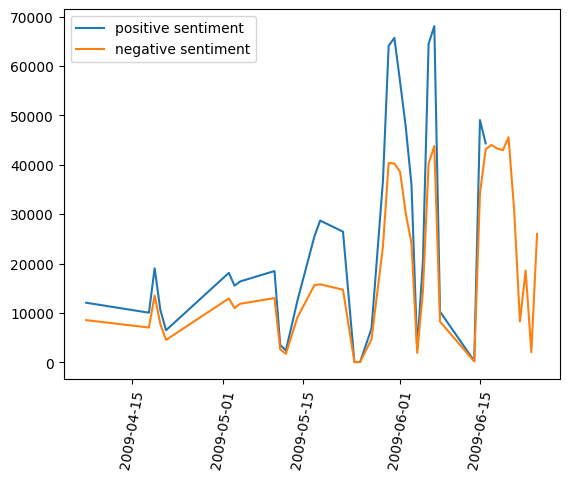

In [77]:
import matplotlib.pyplot as plt
import numpy as np

for tag in ["positive sentiment", "negative sentiment"]:
    df_tag = monthly_sentiments_trend.filter(f.col("label") == tag)
    date_x = df_tag.select("date").toPandas().values
    number_tweeks = df_tag.select("number_tweeks").toPandas().values
    plt.plot(date_x, number_tweeks, label=tag)

plt.legend()
plt.xticks(rotation=80)
plt.show()

### Save the cleaned data

In [88]:
from typing import List
import os
from py4j.java_gateway import JavaObject
from pyspark.sql import SparkSession
import pyspark.sql.types as T


def configure_hadoop(spark: SparkSession):
    hadoop = spark.sparkContext._jvm.org.apache.hadoop  # type: ignore
    conf = hadoop.conf.Configuration()
    fs = hadoop.fs.FileSystem.get(conf)
    return hadoop, conf, fs


def ensure_exists(spark: SparkSession, file: str):
    hadoop, _, fs = configure_hadoop(spark)
    if not fs.exists(hadoop.fs.Path(file)):
        out_stream = fs.create(hadoop.fs.Path(file, False))
        out_stream.close()


def delete_location(spark: SparkSession, location: str):
    hadoop, _, fs = configure_hadoop(spark)
    if fs.exists(hadoop.fs.Path(location)):
        fs.delete(hadoop.fs.Path(location), True)


def get_files(spark: SparkSession, src_dir: str) -> List[JavaObject]:
    """Get list of files in HDFS directory"""
    hadoop, _, fs = configure_hadoop(spark)
    ensure_exists(spark, src_dir)
    files = []
    for f in fs.listStatus(hadoop.fs.Path(src_dir)):
        if f.isFile():
            files.append(f.getPath())
    if not files:
        raise ValueError("Source directory {} is empty".format(src_dir))

    return files


def copy_merge_into(
    spark: SparkSession, src_dir: str, dst_file: str, delete_source: bool = True
):
    """Merge files from HDFS source directory into single destination file

    Args:
        spark: SparkSession
        src_dir: path to the directory where dataframe was saved in multiple parts
        dst_file: path to single file to merge the src_dir contents into
        delete_source: flag for deleting src_dir and contents after merging

    """
    hadoop, conf, fs = configure_hadoop(spark)

    # 1. Get list of files in the source directory
    files = get_files(spark, src_dir)

    # 2. Set up the 'output stream' for the final merged output file
    # if destination file already exists, add contents of that file to the output stream
    if fs.exists(hadoop.fs.Path(dst_file)):
        tmp_dst_file = dst_file + ".tmp"
        tmp_in_stream = fs.open(hadoop.fs.Path(dst_file))
        tmp_out_stream = fs.create(hadoop.fs.Path(tmp_dst_file), True)
        try:
            hadoop.io.IOUtils.copyBytes(
                tmp_in_stream, tmp_out_stream, conf, False
            )  # False means don't close out_stream
        finally:
            tmp_in_stream.close()
            tmp_out_stream.close()

        tmp_in_stream = fs.open(hadoop.fs.Path(tmp_dst_file))
        out_stream = fs.create(hadoop.fs.Path(dst_file), True)
        try:
            hadoop.io.IOUtils.copyBytes(tmp_in_stream, out_stream, conf, False)
        finally:
            tmp_in_stream.close()
            fs.delete(hadoop.fs.Path(tmp_dst_file), False)
    # if file doesn't already exist, create a new empty file
    else:
        out_stream = fs.create(hadoop.fs.Path(dst_file), False)

    # 3. Merge files from source directory into the merged file 'output stream'
    try:
        for file in files:
            in_stream = fs.open(file)
            try:
                hadoop.io.IOUtils.copyBytes(
                    in_stream, out_stream, conf, False
                )  # False means don't close out_stream
            finally:
                in_stream.close()
    finally:
        out_stream.close()

    # 4. Tidy up - delete the original source directory
    if delete_source:
        delete_location(spark, src_dir)

In [96]:
# write outputs to csv
TMP_OUTPUT_DIR = os.path.join(os.path.dirname(OUTPUT_FILE), "tmp")
# df_cleaned.write.csv(OUTPUT_FILE)
# print(f"\n - cleaned data is saved in parts to: \n{OUTPUT_FILE}")

# your dataframe (repartitioning for demo purposes only)
df_cleaned = df_cleaned.repartition(5)

# write headers first (required for csv only)
headers = spark.createDataFrame(
    data=[[f.name for f in df.schema.fields]],
    schema=T.StructType(
        [T.StructField(f.name, T.StringType(), False) for f in df.schema.fields]
    ),
)
headers.write.csv(TMP_OUTPUT_DIR)


# write csv headers to output file first
copy_merge_into(
    spark,
    TMP_OUTPUT_DIR,
    OUTPUT_FILE,
    delete_source=True,
)

# Write main outputs
# dataframe written to TMP_OUTPUT_DIR folder in 5 separate csv files (one for each partition)
df_cleaned.write.csv(TMP_OUTPUT_DIR)
print(f"\n - cleaned data is saved in parts to {TMP_OUTPUT_DIR}")

# merge main csv files in folder into single file
copy_merge_into(
    spark,
    TMP_OUTPUT_DIR,
    OUTPUT_FILE,
    delete_source=True,
)
print(f"\n - cleaned data is saved as one file to {OUTPUT_FILE}")